In [1]:
import json
import csv

import sys
sys.path.append("../../")
sys.path.append("/home/rosa/DefmodEnv/lib/python3.7/site-packages/")

import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
import math
import pickle

import implicitmodules.torch as dm
from implicitmodules.torch.HamiltonianDynamic import Hamiltonian, shoot
from implicitmodules.torch.MultiShape import MultiShapeHamiltonian
from implicitmodules.torch.Attachment.attachment_varifold import VarifoldAttachment2D

torch.set_default_tensor_type(torch.DoubleTensor)
dtype = torch.float64

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


/home/rosa/DefmodEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
with open('../../data/nutsdata.pickle', 'rb') as f:
            lines, sigv, sig = pickle.load(f)

source = torch.tensor(lines[0][::2], requires_grad=True, dtype=torch.float64)[1:]
target = torch.tensor(lines[1][::2]  , requires_grad=True, dtype=torch.float64)[1:]


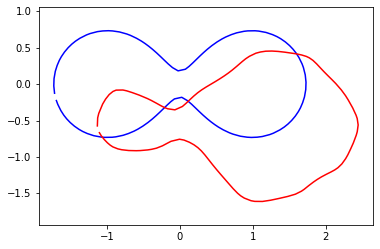

In [3]:
plt.plot(source[:,0].detach(), source[:,1].detach(), '-b')
plt.plot(target[:,0].detach(), target[:,1].detach(), '-r')
plt.axis('equal')
plt.show()

In [4]:
source = source
target = target + torch.ones(len(target),1) * torch.tensor([[0, 0.5]])

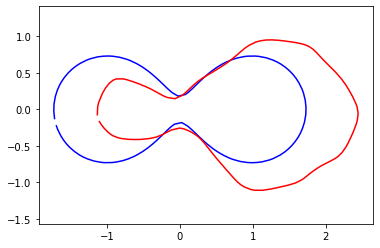

In [5]:
plt.plot(source[:,0].detach(), source[:,1].detach(), '-b')
plt.plot(target[:,0].detach(), target[:,1].detach(), '-r')
plt.axis('equal')
plt.show()

In [6]:
source_deformable = dm.Models.DeformablePoints(source)
target_deformable = dm.Models.DeformablePoints(target)

scale_scaling = 0.6
scaling0 = dm.DeformationModules.LocalScaling(2, scale_scaling, gd=torch.tensor([[-1.,0.]], dtype=torch.float64, requires_grad=True))
scaling1 = dm.DeformationModules.LocalScaling(2, scale_scaling, gd=torch.tensor([[1.,0.]], dtype=torch.float64, requires_grad=True))

scale_translation = 10.
translation = dm.DeformationModules.Translations(2, 1, scale_translation, gd=torch.tensor([[0., 0.]]))
translation.to_(dtype)

compound_man = dm.Manifolds.CompoundManifold([source_deformable.silent_module.manifold.clone(requires_grad=True), scaling0.manifold.clone(requires_grad=True), scaling1.manifold.clone(requires_grad=True), translation.manifold.clone(requires_grad=True)]), 

sigmas_varifold = [1., 0.2]
attach = dm.Attachment.VarifoldAttachment(2, sigmas_varifold)


shoot_solver = 'torch_euler'
shoot_it = 10

model = dm.Models.RegistrationModel([source_deformable], [scaling0, scaling1, translation], [attach],lam=10.)

In [7]:
#multishape.manifold.fill_gd(model.init_manifold.gd)
#multishape.manifold.fill_cotan(model.init_manifold.cotan)
#Ham = MultiShapeHamiltonian.Hamiltonian_multishape(multishape, constraints)


In [8]:
fitter = dm.Models.Fitter(model)
shoot_solver = 'torch_euler'
costs = fitter.fit([target_deformable], 200, options={'shoot_solver': shoot_solver, 'shoot_it': shoot_it})

Starting optimization with method Scipy L-BFGS-B
Initial cost={'deformation': 0.0, 'attach': 81.20685236708243}
Time: 1.2643422949913656
Iteration: 0
Costs
deformation=0.0634767532827413
attach=67.97794052772163
Total cost=68.04141728100437
Time: 1.9184694879950257
Iteration: 1
Costs
deformation=0.14419784866619928
attach=59.16042952152503
Total cost=59.304627370191234
Time: 2.544046247989172
Iteration: 2
Costs
deformation=0.1813297067172995
attach=56.746879561137185
Total cost=56.928209267854484
Time: 2.863219107995974
Iteration: 3
Costs
deformation=0.20834988569810725
attach=53.22210457824603
Total cost=53.43045446394414
Time: 3.1819361399975605
Iteration: 4
Costs
deformation=0.17992912162780927
attach=49.03168611819815
Total cost=49.21161523982596
Time: 3.4986190409981646
Iteration: 5
Costs
deformation=0.1349038426637224
attach=42.10387366582417
Total cost=42.23877750848789
Time: 3.861329551000381
Iteration: 6
Costs
deformation=0.13161368358512981
attach=34.15671841419416
Total cost

Time: 17.31525973699172
Iteration: 39
Costs
deformation=0.6107611405175118
attach=4.747717129941922
Total cost=5.358478270459433
Time: 17.629205335993902
Iteration: 40
Costs
deformation=0.6107700500831648
attach=4.747708174398504
Total cost=5.358478224481669
Time: 17.9420186609932
Iteration: 41
Costs
deformation=0.6107610415816954
attach=4.747717164431808
Total cost=5.358478206013504
Time: 18.255731799989007
Iteration: 42
Costs
deformation=0.6107501858377948
attach=4.747727993752395
Total cost=5.35847817959019
Time: 18.565808326995466
Iteration: 43
Costs
deformation=0.6107356726256827
attach=4.74774240297684
Total cost=5.358478075602523
Time: 18.878846904000966
Iteration: 44
Costs
deformation=0.6107004859584537
attach=4.7477773122216504
Total cost=5.358477798180104
Time: 19.20330667500093
Iteration: 45
Costs
deformation=0.6106813845845874
attach=4.74779567623953
Total cost=5.358477060824118
Time: 19.514761973987333
Iteration: 46
Costs
deformation=0.610643412620256
attach=4.747831900819

Time: 32.09768231199996
Iteration: 78
Costs
deformation=0.16896611645781912
attach=4.737707726019487
Total cost=4.906673842477305
Time: 32.42449944099644
Iteration: 79
Costs
deformation=0.16774685243400042
attach=4.738744424672383
Total cost=4.906491277106383
Time: 32.73679341300158
Iteration: 80
Costs
deformation=0.16770832537012262
attach=4.738758954307976
Total cost=4.906467279678099
Time: 33.050289697988774
Iteration: 81
Costs
deformation=0.1676907408774298
attach=4.738771643438362
Total cost=4.906462384315792
Time: 33.38021563299117
Iteration: 82
Costs
deformation=0.16767811425014162
attach=4.738778243110797
Total cost=4.9064563573609385
Time: 33.76001014398935
Iteration: 83
Costs
deformation=0.1675514937709216
attach=4.738880199147495
Total cost=4.906431692918416
Time: 34.114225026991335
Iteration: 84
Costs
deformation=0.16728767866586147
attach=4.739105863523836
Total cost=4.906393542189697
Time: 34.436496440990595
Iteration: 85
Costs
deformation=0.16719232840680803
attach=4.739

Time: 49.28511097798764
Iteration: 117
Costs
deformation=0.17896516792545797
attach=4.658603419951106
Total cost=4.837568587876564
Time: 49.61509178898996
Iteration: 118
Costs
deformation=0.1819021265464168
attach=4.6529111895126185
Total cost=4.834813316059035
Time: 49.92540048099181
Iteration: 119
Costs
deformation=0.18514003801902068
attach=4.647774865300409
Total cost=4.83291490331943
Time: 50.53918759999215
Iteration: 120
Costs
deformation=0.1869230701993061
attach=4.644962054713719
Total cost=4.8318851249130255
Time: 50.85319685099239
Iteration: 121
Costs
deformation=0.18774650051921166
attach=4.641112668475547
Total cost=4.828859168994758
Time: 51.503042208991246
Iteration: 122
Costs
deformation=0.18776021068496737
attach=4.639061806627716
Total cost=4.826822017312683
Time: 52.201844953000546
Iteration: 123
Costs
deformation=0.1864830748180539
attach=4.639587587287206
Total cost=4.82607066210526
Time: 52.83657881399267
Iteration: 124
Costs
deformation=0.18672707683170348
attach=

Time: 67.95647766299953
Iteration: 156
Costs
deformation=0.18267369496094052
attach=4.561255565738485
Total cost=4.743929260699425
Time: 68.27018096699612
Iteration: 157
Costs
deformation=0.1818123766359214
attach=4.561579637054365
Total cost=4.743392013690286
Time: 68.5981100229983
Iteration: 158
Costs
deformation=0.18201067378117683
attach=4.560911698525629
Total cost=4.742922372306806
Time: 68.92662490899966
Iteration: 159
Costs
deformation=0.18073024279970576
attach=4.56195957245221
Total cost=4.742689815251916
Time: 69.26856634698925
Iteration: 160
Costs
deformation=0.1809393169691067
attach=4.56141116197756
Total cost=4.742350478946666
Time: 69.90780343899678
Iteration: 161
Costs
deformation=0.17957270547020895
attach=4.562660921134594
Total cost=4.742233626604802
Time: 70.65127889699943
Iteration: 162
Costs
deformation=0.179504450007582
attach=4.5626574212913695
Total cost=4.7421618712989515
Time: 70.98708332199021
Iteration: 163
Costs
deformation=0.17925008209942728
attach=4.56

Time: 83.00818946999789
Iteration: 195
Costs
deformation=0.1940724698860244
attach=4.542063089471249
Total cost=4.736135559357273
Time: 83.33546597098757
Iteration: 196
Costs
deformation=0.19409603034593848
attach=4.542039483169784
Total cost=4.736135513515722
Time: 83.65399315499235
Iteration: 197
Costs
deformation=0.19409645020627136
attach=4.542039049742126
Total cost=4.736135499948397
Time: 84.00430926699482
Iteration: 198
Costs
deformation=0.194098292774461
attach=4.542037197920994
Total cost=4.736135490695455
Optimisation process exited with message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Final cost=4.736135490695455
Model evaluation count=253
Time elapsed = 84.0055891279917


In [9]:
out = model.compute_deformed(shoot_solver, shoot_it)

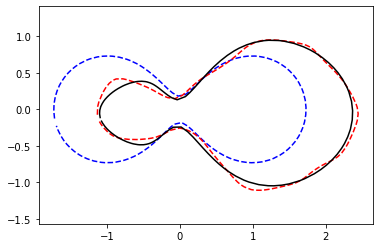

In [10]:
shape_defo = out[0][0]

plt.plot(source[:,0].detach(), source[:,1].detach(), '--b')
plt.plot(target[:,0].detach(), target[:,1].detach(), '--r')
plt.plot(shape_defo[:,0].detach(), shape_defo[:,1].detach(), '-k')
plt.axis('equal')
plt.show()

In [11]:
fac = 5
grid_resolution = [fac*9, fac*4]
gridmod = dm.DeformationModules.DeformationGrid(dm.Utilities.AABB.build_from_points(source).scale(1.5), grid_resolution)

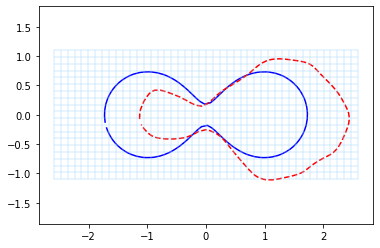

In [12]:
grid = gridmod.togrid()

ax = plt.subplot()
plt.plot(source[:,0].detach(), source[:,1].detach(), '-b')
plt.plot(target[:,0].detach(), target[:,1].detach(), '--r')

dm.Utilities.plot_grid(ax, grid[0], grid[1], color='xkcd:light blue', lw=0.4)
plt.axis('equal')
plt.show()

In [13]:
pts = gridmod.manifold.gd.clone().contiguous()
grid_deformable = dm.Models.DeformablePoints(pts)

In [14]:
modules = dm.DeformationModules.CompoundModule(copy.copy(model.modules))
modules.manifold.fill(model.init_manifold.clone(), copy=True)

silent = copy.copy(modules[0])
modlist = copy.copy(modules[1:])

controls = [[torch.tensor([]), torch.tensor([]), *[modlist[i].controls for i in range(len(modlist))]]]


In [15]:
#compound_man_grid = dm.Manifolds.CompoundManifold([source_deformable.silent_module.manifold.clone(requires_grad=True), grid_deformable.silent_module.manifold.clone(requires_grad=True), scaling0.manifold.clone(requires_grad=True), scaling1.manifold.clone(requires_grad=True), translation.manifold.clone(requires_grad=True)])

In [16]:
Ham_grid = dm.HamiltonianDynamic.Hamiltonian([silent, gridmod, *modlist])
#dm.HamiltonianDynamic.shoot(Ham_grid, shoot_it, shoot_solver, controls=controls)

shoot(Ham_grid, shoot_solver, shoot_it)
shape_defo_grid = Ham_grid.module.modules[0].manifold.gd


In [17]:
Ham_grid.module.modules[1]

In [18]:
grid_deformed_pts = Ham_grid.module.modules[1].manifold.gd

In [19]:
grid_deformed = gridmod.togrid()

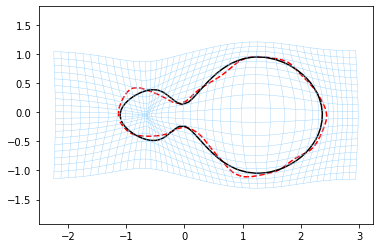

In [20]:
ax = plt.subplot()
#plt.plot(source[0][:,0].detach(), source[0][:,1].detach(), '-b')
#plt.plot(source[1][:,0].detach(), source[1][:,1].detach(), '-b')
plt.plot(target[:,0].detach(), target[:,1].detach(), '--r')
plt.plot(shape_defo_grid[:,0].detach(), shape_defo[:,1].detach(), '-k')

dm.Utilities.plot_grid(ax, grid_deformed[0], grid_deformed[1], color='xkcd:light blue', lw=0.4)
plt.axis('equal')
plt.show()